In [1]:
from statsmodels.formula.api import ols
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


df = pd.read_csv('Surface_Data.csv')
df


,x,y,z
0,14,11,132
1,12,11,154
2,13,10,158
3,10,12,132
4,12,12,121
...,...,...,...
335,14,35,38
336,17,35,54
337,12,35,38
338,15,36,49


                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     267.7
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.44e-70
Time:                        16:56:24   Log-Likelihood:                -1454.1
No. Observations:                 340   AIC:                             2914.
Df Residuals:                     337   BIC:                             2926.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.2697      5.318     30.888      0.0

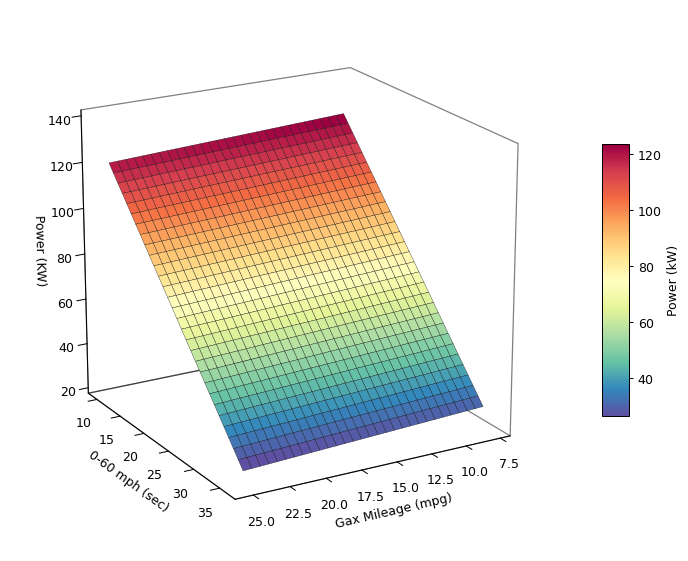

In [2]:
# 多项式拟合z=f(x, y)=a+bx+cy+dx2+ey2
formula = 'z~x+y'
est = ols(formula, data=df).fit()
print(est.summary())

N = 30
xmar = np.linspace(min(df.x), max(df.x), N)
ymar = np.linspace(min(df.y), max(df.y), N)
X, Y = np.meshgrid(xmar, ymar)
df_grid = pd.DataFrame({'x': X.flatten(), 'y': Y.flatten()})

Z = est.predict(df_grid)

fig = plt.figure(figsize=(10, 8), dpi=90)
ax = fig.gca(projection='3d')
# ax.set_aspect('equal','box')
ax.view_init(azim=60, elev=20)
# 改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
# --------------------------------------------------------------------------------------
ax.grid(False)

ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
# =============================================================================
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# =============================================================================

ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')

p = ax.plot_surface(X, Y, Z.values.reshape(N, N), rstride=1, cstride=1, cmap='Spectral_r',
                    alpha=1, edgecolor='k', linewidth=0.25)

ax.set_xlabel("Gax Mileage (mpg)")
ax.set_ylabel("0-60 mph (sec)")
ax.set_zlabel("Power (KW)")
ax.set_zlim(20, 140)


cbar = fig.colorbar(p, shrink=0.5, aspect=10)
cbar.set_label('Power (kW)')
# fig.savefig('三维曲面图3.pdf')


<a list of 10 text.Text objects>

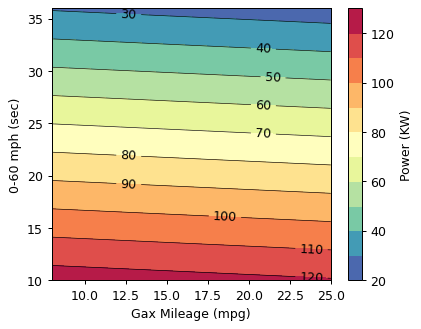

In [3]:
# -------------------------等高线图---------------------------------------------------

fig, ax = plt.subplots(figsize=(5, 4), dpi=90)

CS = ax.contour(X, Y, Z.values.reshape(N, N),
                levels=10, linewidths=0.5, colors='k')
cntr = ax.contourf(X, Y, Z.values.reshape(N, N), levels=10, cmap="Spectral_r")
#scat=ax.scatter(df.x, df.y,c=df.z,s=40, linewidths=0.5, edgecolors="k",alpha=0.8)
ax.set_xlabel("Gax Mileage (mpg)")
ax.set_ylabel("0-60 mph (sec)")

fig.colorbar(cntr, ax=ax, label="Power (KW)")
CS.levels = [int(val) for val in cntr.levels]
ax.clabel(CS, CS.levels, fmt='%.0f', inline=True,  fontsize=10)
